# Shallow Neural Network with one hidden layer

# Packages

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

# Load the Dataset



In [2]:
# Create the flower dataset (provided to students)

def load_planar_dataset():
    np.random.seed(1)

    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality

    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

In [3]:
X, Y = load_planar_dataset()

You have 400 training examples:
- a numpy-array X of dimensions (2, 400) that contains your features. Every column of X is the feature vector for a single training example and contains the coordinates of the point (x1, x2).
- a numpy-array Y of dimensions (1,400) that contains your labels. Every column of Y contains the label y for a single training example (0 for red, 1 for blue).

Visualize the dataset. You have some red points (label y=0) and some blue points(y=1).

Your goal is to build a shallow neural network to fit this data. In other words, we want the model to define regions as either red or blue.

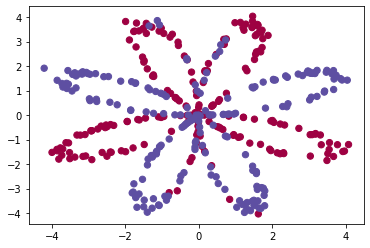

In [4]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

## A2 - Simple Logistic Regression

Let's start by checking how logistic regression performs on this problem. You are gonna build a simple logistic regression model in Numpy.

Build a function to initialize the parameters of the logistic regression

In [15]:
def initialize_parameters(n_x, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias vector of shape (n_y, 1)
    """
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))

    parameters = {"W": W,
                  "b": b}

    return parameters

Build a function that computes the sigmoid of a numpy array of any size

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Forward Propagation

Build a function that takes as inputs the nu

In [17]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    cache = {"Z1": Z1,
             "A1": A1}

    return A1, cache

In [22]:
def compute_cost(A1, Y):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)

    """

    m = Y.shape[1] # number of examples

    logprobs = np.multiply(np.log(A1),Y) + np.multiply(np.log(1-A1),1-Y)
    cost = -np.sum(logprobs)/m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17
    return cost

In [10]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    #number of training examples
    m = X.shape[1]

    # retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]

    # Retrieve A1 and A2 from dictionary "cache".
    A1 = cache["A1"]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ1 = A1 - Y
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {"dW1": dW1,
             "db1": db1}

    return grads

In [11]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    parameters = {"W1": W1,
                  "b1": b1}

    return parameters

In [19]:
def model(X, Y, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_y)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A1, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A1, Y)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [23]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A1, cache = forward_propagation(X, parameters)
    predictions = (A1 > 0.5)

    return predictions

In [25]:
# Function to plot decision boundary (provided to students)

def plot_decision_boundary(model, X, y):

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Cost after iteration 0: 0.693769
Cost after iteration 1000: 0.673146
Cost after iteration 2000: 0.673146
Cost after iteration 3000: 0.673146
Cost after iteration 4000: 0.673146
Cost after iteration 5000: 0.673146
Cost after iteration 6000: 0.673146
Cost after iteration 7000: 0.673146
Cost after iteration 8000: 0.673146
Cost after iteration 9000: 0.673146


Text(0.5, 1.0, 'Decision Boundary')

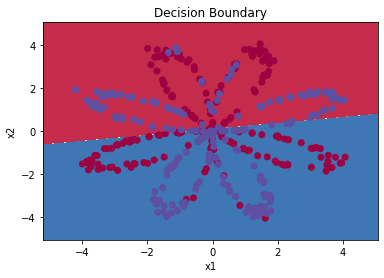

In [26]:
# Build a model with a n_h-dimensional hidden layer
parameters = model(X, Y, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary")

In [27]:
# Print accuracy (provided to students?)
predictions = predict(parameters, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)

print ('Accuracy of logistic regression: %d ' % accuracy +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


You can now plot the decision boundary of these models! Run the code below.



## A3 - Build the Neural Network

1. Define the neural network structure .
2. Initialize the model's parameters
3. Training Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

In practice, you'll build helper functions to compute steps 1-3, then merge them into one function called `model()`. Once you've built `model()` and learned the right parameters, you can make predictions on new data.

# Initialize parameters

- Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- initialize the bias vectors as zeros.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    """
    return 1/(1+np.exp(-z))

# Forward propagation

- Implement using these steps:
    1. Retrieve each parameter from the dictionary "parameters".
    2. Implement Forward Propagation.
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [ ]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

### Compute the Cost

Given the predictions on all the examples, you can also compute the cost $J$ as follows:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a2^{(i)}\right) + (1-y^{(i)})\log\left(1- a2^{(i)}\right)  \large  \right) \small \tag{6}$$

Implement `compute_cost()` to compute the value of the cost $J$.

- You can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
- If you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  
- You can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array).
- You can also cast the array as a type `float` using `float()`.

In [ ]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)

    """

    m = Y.shape[1] # number of examples

    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = -np.sum(logprobs)/m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17
    return cost

### 4.5 - Implement Backpropagation

Using the cache computed during forward propagation, you can now implement backward propagation.

IMPO (notation): in general for a generic numpy array $\theta$ in the neural network architecture, we denote d$\theta$ the partial derivative of the total cost $J$ with respect to $\theta$.

Implement the function `backward_propagation()`.

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    #number of training examples
    m = X.shape[1]

    # retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Retrieve A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

In [ ]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

### Model

Integrate your functions in `model()`

In [ ]:
def model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

# Test the Model

Predict with your model by building `predict()`.
Use forward propagation to predict results.


In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

Test the Model on the Planar Dataset

Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220619
Cost after iteration 8000: 0.219398
Cost after iteration 9000: 0.218482


Text(0.5, 1.0, 'Decision Boundary')

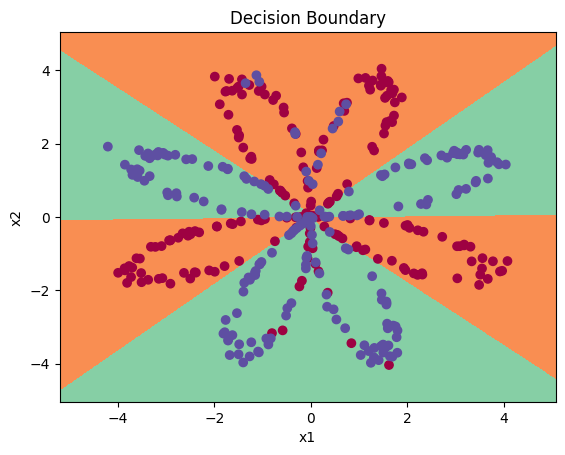

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters = model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary")

In [ ]:
# Print accuracy (provided to students?)
predictions = predict(parameters, X)
accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)

print ('Accuracy: %d' % accuracy + '%')

Accuracy: 90%


**References**:
- http://cs231n.github.io/neural-networks-case-study/